In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

HRM1017 analogread analysis


In [3]:
si=75.8
print("sampling interval for N=1024*1024: ", si)
freq=1/(si/1024/1024)
print("sampling frequency : ", freq, "Hz")

sampling interval for N=1024*1024:  75.8
sampling frequency :  13833.456464379948 Hz


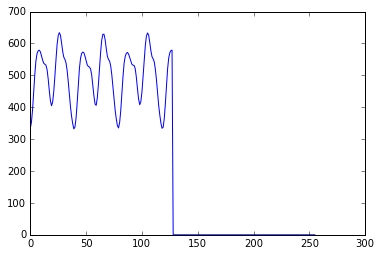

In [4]:
data=np.loadtxt('hrm1017.dat', delimiter=',')
plt.plot(data)

256
32751652.0
65503304.0


C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


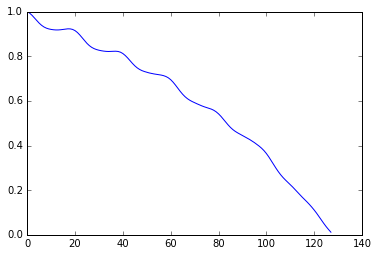

In [10]:
N=256
N2=N/2
def funcM(x,t):
    ret=sum(x[0:N2])+sum(x[t:N2+t])
    return ret
x = data
print(np.size(x))
# smarter way paper
F=np.fft.fft(x)
ps=np.real(F*np.conjugate(F))
r=np.real(np.fft.ifft(ps))
x2=x*x
m=np.zeros(N2)
for i in np.arange(N2):
    m[i]=funcM(x2,i)
print(r[0])
print(m[0])
r=r[0:N2]
nsdf=2*r/m
plt.plot(nsdf)